<a href="https://colab.research.google.com/github/robinsonm2021/Data_science/blob/main/Matthew_Robinson_Stats_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# STA 2023 Final Project
## Directions:

1) Replace the image dataset in the google slides with your own data.

2) Comment and explain all code to the best of your ability.

3) Run your model 3 times. 

4) Report best, worst, and average of the three runs. 




Use any and all resources available to you.

Comment and explain the code.

Answer the questions to the best of your abilities.

If you have any questions, txt 561-479-8123

Save this notebook to your GitHub and submit the link on Canvas


In [1]:
%%capture
!pip install wandb
!apt-get install poppler-utils
!pip install pdf2image
!pip install flashtorch
import requests
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np
import torch
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb

In [2]:
def GPU(data): #use this code to include a powerpoint presentation.
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data):
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x):
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray')
    ax.axis('off')
    fig.set_size_inches(5, 5)
    plt.show()
    
def get_google_slide(url):
    url_head = "https://docs.google.com/presentation/d/"
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url):
    url = get_google_slide(url)
    r = requests.get(url, allow_redirects=True)
    open('file.pdf', 'wb').write(r.content)
    images = convert_from_path('file.pdf', 500)
    return images

def load(image):

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()} #Use this so the code can lable each picture and link it to a certain item or image.

model = alexnet(weights='DEFAULT').to(device)
model.eval();

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [38]:
url = "https://docs.google.com/presentation/d/1GUmZhPPDlohcjLM7ABXEdHAvBmxW10_oDe4HfAgrn7M/edit#slide=id.p" #this is used to include the url of the powerpoint presentation.

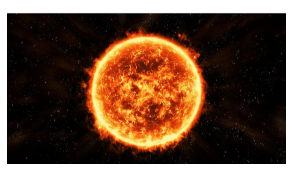

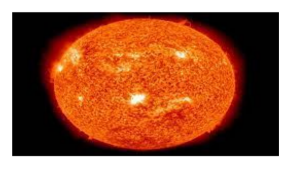

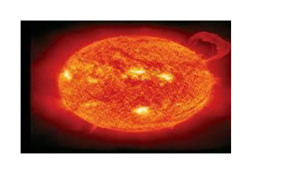

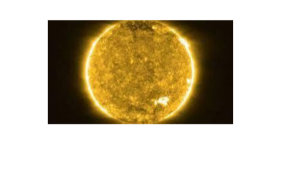

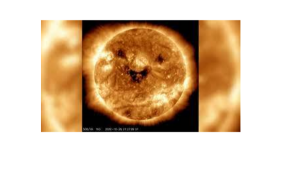

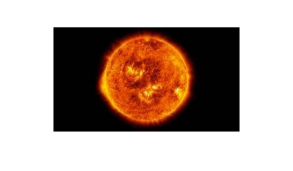

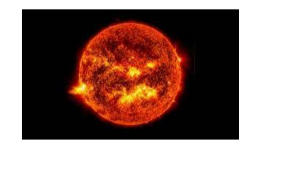

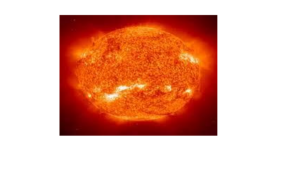

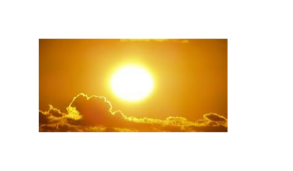

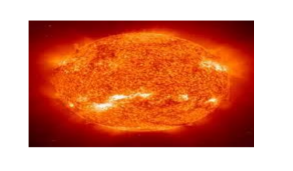

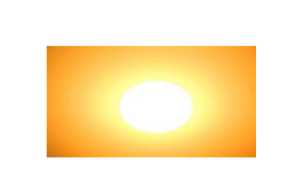

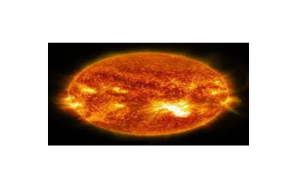

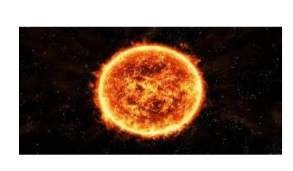

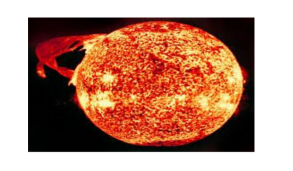

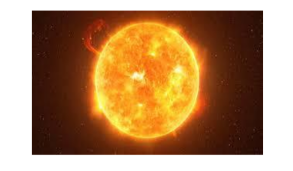

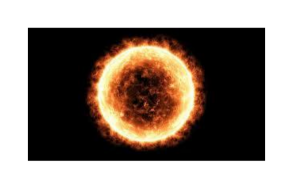

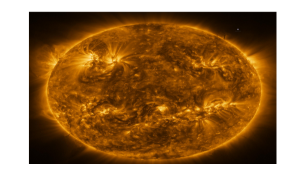

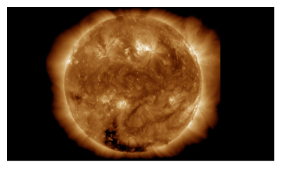

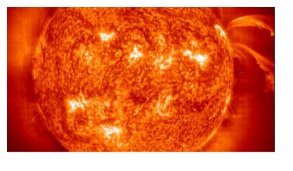

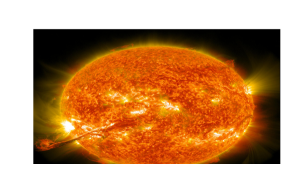

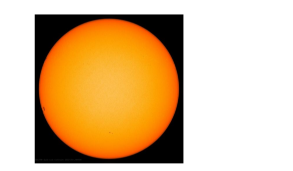

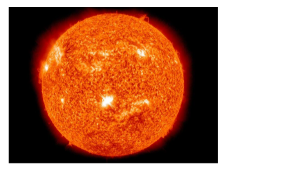

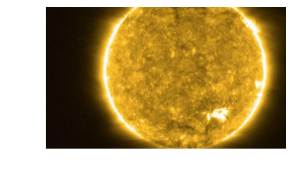

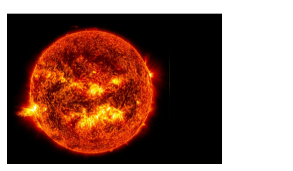

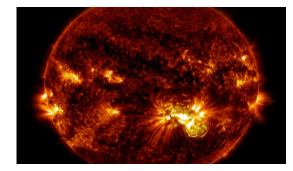

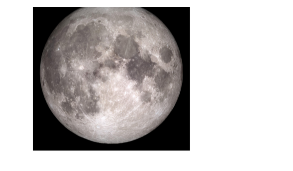

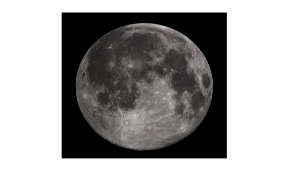

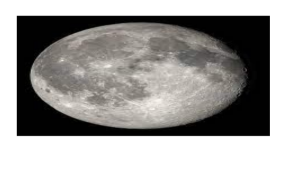

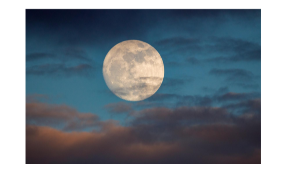

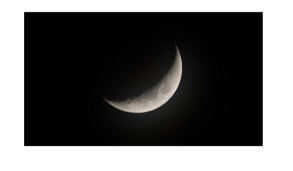

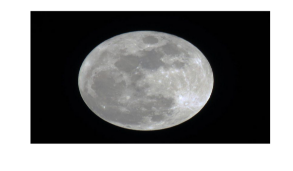

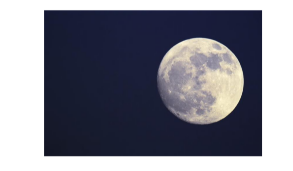

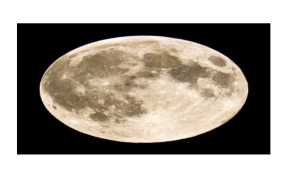

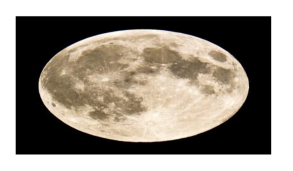

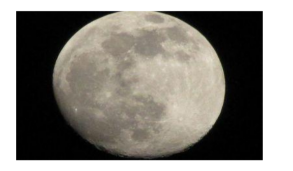

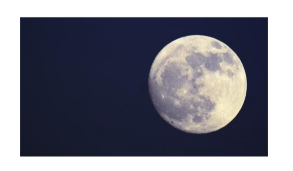

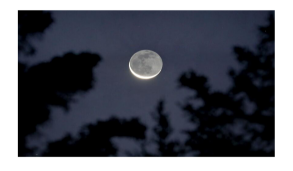

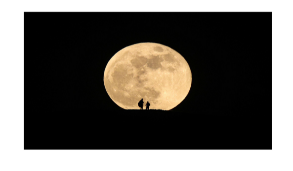

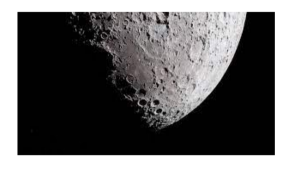

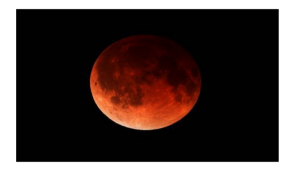

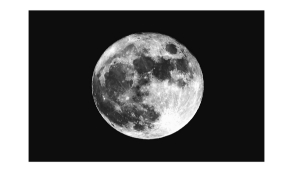

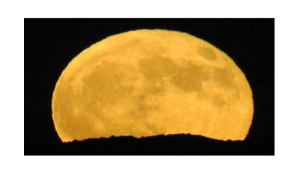

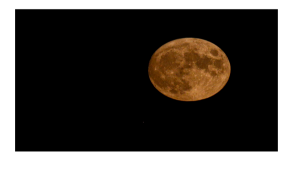

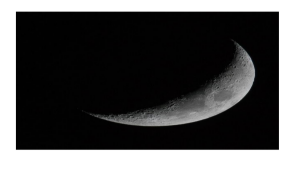

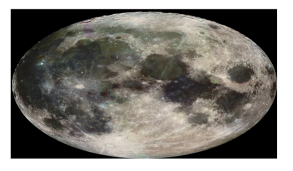

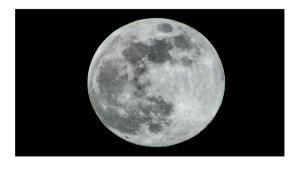

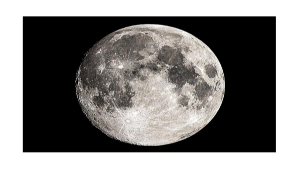

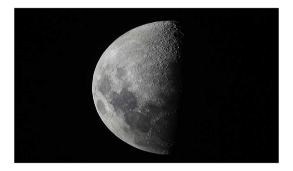

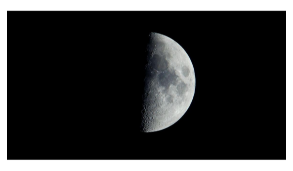

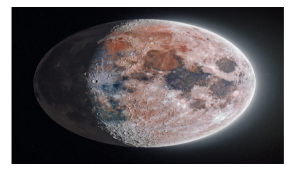

In [5]:
images = [] # this code will stack the images from the powerpoint while also allowing them to be labeled.

for image in get_slides(url):

    plot(image)

    images.append(load(image))

images = torch.vstack(images)

In [6]:
images.shape # the shape of the images which are averaged.

torch.Size([50, 3, 224, 224])

In [7]:
model(images) #generally, when you have to deal with image, text, audio or video data, you can use standard python packages that load data into a numpy array. Then you can convert this array into a torch.

tensor([[-3.9070,  3.9579, -5.2338,  ...,  2.9601,  2.1581,  1.2552],
        [-2.0516,  6.0745, -6.8385,  ...,  8.3115,  1.6864,  0.7989],
        [-0.8476,  6.4633, -4.2630,  ...,  3.6540,  3.0044,  0.8079],
        ...,
        [ 0.4473,  1.9690,  3.7306,  ...,  3.9345,  2.5957,  4.9354],
        [ 0.3067,  1.5032,  3.9995,  ...,  3.2914,  2.3704,  6.8664],
        [-2.6648,  1.0124, -0.5037,  ...,  7.5087,  4.8187,  2.4273]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images) # putting a variable name to the image

In [9]:
y.shape #the size of the presentation in code.

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy() #this will allow the cpu to create guesses of what the images are.

In [11]:
for i in list(guesses): # this will guess and label the computers guesses.
    print(labels[i])

orange
orange
pomegranate
pick, plectrum, plectron
potpie
orange
lampshade, lamp shade
lampshade, lamp shade
spotlight, spot
goldfish, Carassius auratus
microwave, microwave oven
frying pan, frypan, skillet
orange
traffic light, traffic signal, stoplight
orange
nematode, nematode worm, roundworm
gong, tam-tam
potpie
honeycomb
butternut squash
ping-pong ball
orange
soup bowl
traffic light, traffic signal, stoplight
volcano
gong, tam-tam
gong, tam-tam
car mirror
bubble
nematode, nematode worm, roundworm
pick, plectrum, plectron
golf ball
frying pan, frypan, skillet
gong, tam-tam
gong, tam-tam
golf ball
bubble
pick, plectrum, plectron
pick, plectrum, plectron
jellyfish
bubble
spaghetti squash
pick, plectrum, plectron
nematode, nematode worm, roundworm
dough
golf ball
gong, tam-tam
bubble
pick, plectrum, plectron
frying pan, frypan, skillet


In [12]:
Y = np.zeros(50,)
Y[25:] = 1

In [13]:
Y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
X = y.detach().cpu().numpy() 

In [15]:
X.shape

(50, 1000)

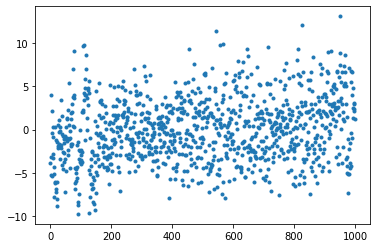

In [16]:
plt.plot(X[0],'.') #plot of the images

In [17]:
X[0] #array 

array([-3.9070420e+00,  3.9578757e+00, -5.2337790e+00, -3.1841359e+00,
       -5.4185162e+00,  2.1761739e+00, -3.8871765e-01, -8.0380821e-01,
        2.5868350e-01, -2.7984064e+00, -3.3240333e+00, -7.7804689e+00,
       -4.3626723e+00, -5.1429954e+00, -6.0473452e+00,  2.7401066e-01,
       -6.2075410e+00, -6.8906479e+00, -1.2130429e+00, -7.2712369e+00,
       -8.8414478e+00, -8.0750799e+00, -6.1152143e+00, -1.4165738e+00,
       -1.9462948e+00,  5.0131309e-01, -2.1408112e+00, -2.2874004e-01,
        1.1022315e+00, -1.7108792e+00, -3.3750157e+00, -1.7465311e-01,
       -1.9189885e+00,  3.1573236e-01,  3.3987501e+00, -2.1777177e+00,
       -1.7767377e+00, -5.6014454e-01,  1.5169964e+00, -4.0979590e+00,
       -7.9064518e-01, -4.5674133e+00, -2.5729365e+00, -1.0901095e+00,
       -2.7231009e+00, -3.7830992e+00, -1.5625951e+00, -7.4135172e-01,
       -3.4640894e+00, -7.2826548e+00, -4.7620397e+00,  3.3211970e-01,
       -1.0984843e+00,  1.2408814e+00,  1.3927554e+00, -1.2852876e+00,
      

In [18]:
np.argmax(X[0]) #the number of guesses available to the computer.

950

In [19]:
labels[948]#this labels  and guesses a specific image attached to a number.

'Granny Smith'

In [20]:
top_ten = np.argsort(X[0])[::-1][0:10] # allows the computer to guess and sort 10 images.

In [21]:
for i in top_ten:
    print(labels[i])

orange
stove
Dutch oven
frying pan, frypan, skillet
nematode, nematode worm, roundworm
fire screen, fireguard
jellyfish
pick, plectrum, plectron
bottlecap
space heater


In [35]:
labels #The computers guesses for the images.

{0: 'tench, Tinca tinca',
 1: 'goldfish, Carassius auratus',
 2: 'great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias',
 3: 'tiger shark, Galeocerdo cuvieri',
 4: 'hammerhead, hammerhead shark',
 5: 'electric ray, crampfish, numbfish, torpedo',
 6: 'stingray',
 7: 'cock',
 8: 'hen',
 9: 'ostrich, Struthio camelus',
 10: 'brambling, Fringilla montifringilla',
 11: 'goldfinch, Carduelis carduelis',
 12: 'house finch, linnet, Carpodacus mexicanus',
 13: 'junco, snowbird',
 14: 'indigo bunting, indigo finch, indigo bird, Passerina cyanea',
 15: 'robin, American robin, Turdus migratorius',
 16: 'bulbul',
 17: 'jay',
 18: 'magpie',
 19: 'chickadee',
 20: 'water ouzel, dipper',
 21: 'kite',
 22: 'bald eagle, American eagle, Haliaeetus leucocephalus',
 23: 'vulture',
 24: 'great grey owl, great gray owl, Strix nebulosa',
 25: 'European fire salamander, Salamandra salamandra',
 26: 'common newt, Triturus vulgaris',
 27: 'eft',
 28: 'spotted salamander, Ambystoma 

(array([ 14.,  60., 159., 217., 221., 179.,  93.,  40.,  14.,   3.]),
 array([-9.774414 , -7.483682 , -5.1929502, -2.902218 , -0.6114861,
         1.679246 ,  3.9699779,  6.26071  ,  8.551442 , 10.842174 ,
        13.132906 ], dtype=float32),
 <a list of 10 Patch objects>)

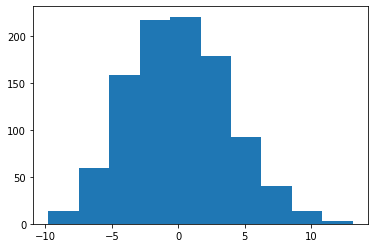

In [23]:
plt.hist(X[0]) # A histogram of the guesses and images.

In [24]:
X = GPU_data(X) #labels the data with a variable
Y = GPU_data(Y)

In [25]:
def softmax(x): #Tensor rescaling them so that the elements of the n-dimensional output Tensor lie in the range [0,1] and sum to 1.
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [26]:
def cross_entropy(outputs, labels):            
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [27]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [28]:
def Truncated_Normal(size):

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [29]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [30]:
X.shape

torch.Size([50, 1000])

In [31]:
def get_batch(mode):
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [32]:
def model(x,w):

    return x@w[0]

In [33]:
def make_plots():
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [37]:
wb.init(project="Linear_Model_Photo_1");
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs):

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▄▇▅▁▄▃▅▂▄▇▆▃▃▃▄▅▃█▁▃▆▄▃▄▆▁▆▅▄▆█▁▇█▇▂▃▇▇▆
loss,▅▂▄█▅▆▄▇▅▂▃▆▆▆▅▄▆▁█▆▃▅▆▅▃█▃▄▅▃▁█▂▁▂▇▆▂▂▃
acc_train,0.4375
loss,0.87576


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


https://tensorspace.org/

Best: 

Run 2(winter-surf-11): .9668

Worst: 

Run 3(winter-lion-12): .4913

Average:
.80083